# Определение перспективного тарифа для телеком компании

## Откройте файл с данными и изучите общую информацию

In [1]:
#загрузим нужыне в работе билблиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime
from scipy import stats as st

#кол-во колонок на просмотре
pd.set_option('display.max_columns', 25)
#большие числа показывать без плавующей точки
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# загружаем данные по всем таблицам
# серверный путь
try:
    users = pd.read_csv('/datasets/users.csv')
    calls = pd.read_csv('/datasets/calls.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
# локальный путь
except:
    users = pd.read_csv('C:/Dev/Jupyter/dist/projects//datasets/users.csv')
    calls = pd.read_csv('C:/Dev/Jupyter/dist/projects//datasets/calls.csv')
    messages = pd.read_csv('C:/Dev/Jupyter/dist/projects//datasets/messages.csv')
    internet = pd.read_csv('C:/Dev/Jupyter/dist/projects//datasets/internet.csv')
    tariffs = pd.read_csv('C:/Dev/Jupyter/dist/projects//datasets/tariffs.csv')
    

Посмотрим какие данные и их тип есть 

In [3]:
for item in (
    [users, calls, internet, messages,
    tariffs]):
    display(item.head(10))
    print(item.info())
    print()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None



,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None



,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None



,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None



,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None



Описание данных 

**Таблица users (информация о пользователях):** \
user_id — уникальный идентификатор пользователя \
first_name — имя пользователя \
last_name — фамилия пользователя \
age — возраст пользователя (годы) \
reg_date — дата подключения тарифа (день, месяц, год) \
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных) \
city — город проживания пользователя \
tarif — название тарифного плана 


*Из данных видим, что 38 пользователей прекратили пользование тарифами. Также необходимо будет привести столбцы reg_date, churn_date к правильному типу данных - даты. Остутсвующие значения в churn_date для работы заменим на 1 - что значит, тариф ативен, и не явлеются ошибкой, но для работы с этой колонкой их нужно заменить.Данный в user_id нужно перевести в целые int*


**Таблица calls (звонки):** 

id — уникальный номер звонка \ 
call_date — дата звонка \
duration — длительность звонка в минутах  \
user_id — идентификатор пользователя, сделавшего звонок 

*В этой таблице необходимо будет привести к нужым типам столбцы: 'call_date' - дата, 'id' - , 'duration'. Чтобы верно посчиать длительность в минутах, также нужно будет окрудлить секунды в бльшуюю сторону*


**Таблица messages (информация о сообщениях):**  

id — уникальный номер звонка
message_date — дата сообщения
user_id — идентификатор пользователя, отправившего сообщение 

*Тут также надо будет привести к нужному типу данных message_date и user_id*

**Таблица internet (информация об интернет-сессиях**

id — уникальный номер сессии \
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах) \
session_date — дата интернет-сессии \
user_id — идентификатор пользователя 

*Такая же проблема видится как и в предудыщей таблице(даты и id)*

**Таблица tariffs (информация о тарифах)**
 
tariff_name — название тарифа \
rub_monthly_fee — ежемесячная абонентская плата в рублях \
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату \
messages_included — количество сообщений в месяц, включённых в абонентскую плату \
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах) \
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата) \
rub_per_message — стоимость отправки сообщения сверх тарифного пакета \
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)  

*Кроме того, что название колонки tariff_name нужно изменить на tariff как он назвается в таблице users*

Данные по всем таблицам загружены, видно что пропуск в данных churn_date — дата прекращения пользования тарифом не явлеются ошибкой, однкао для работы с этой колонкой их нужно заменить, также тип данных замиенить с объекта на дату. 

## Подготовьте данные

### Приведение данных к нужным типам

Pанее при анализе мы обнаружили, что дата по столбцам call_date', 'churn_date', 'message_date', 'reg_date', 'session_date не приведена к формату datetime - исправим это. 

In [4]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")

calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")
calls['id'] = calls['id'].astype('int')
calls['duration'] = calls['duration'].astype('int')

messages['id'] = messages['id'].astype('int')
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")

internet['id'] = internet['id'].astype('int')
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")

### Исправление ошибок в данных

Для рассчета нам потребется окргилть звонки в веерх округлим  В данных есть не нужная колонка Unnamed: 0' - удалим ее. Также по  'tariff_name', изменим название 

Округлим длительность звонков вверх, по данные оператора  нулевые звонки это входящие или звонки длительностью в до 1 минуты и что по уловию тарифа звонки меньше 1 минуты не тарифицируются

In [5]:
#Unnamed: 0' - удалим
internet.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [6]:
#округлим длительность звонков вверх
calls['duration'] = calls['duration'].apply(np.ceil)
#исправим название колонки для удобства в дальнейшей работе
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

### Подсчет данных по каждому пользователю

Выведем сгруппированные данные по звонкам по месяцу, для пользователей

#### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [7]:




#считаем количество звонков и израсходованных минут по месяцам:
calls['month'] = calls['call_date'].dt.month
user_calls = calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id':'count'})\
                  .reset_index()\
                  .rename(columns={'duration':'calls_duration','id':'calls_total'})
user_calls.head()

,user_id,month,calls_duration,calls_total
0,1000,5,142.00,22
1,1000,6,144.00,43
2,1000,7,299.00,47
3,1000,8,367.00,52
4,1000,9,421.00,58


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe32ad6590>]],
      dtype=object)

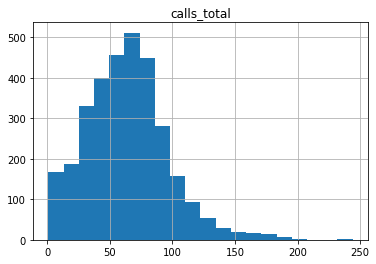

In [8]:
user_calls.hist('calls_total', bins=20)

#### Количество сообщений  по месяцам

In [9]:
messages['month'] = messages['message_date'].dt.month
user_messages = messages.groupby(['user_id', 'month'])\
                        .agg({'id':'count'})\
                        .reset_index()\
                        .rename(columns={'id':'sms_total'})
user_messages.head()

,user_id,month,sms_total
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


#### Количество интренет-трафика  по месяцам

In [10]:
internet['month'] = internet['session_date'].dt.month
user_internet = internet.groupby(['user_id', 'month'])\
                        .agg({'mb_used':'sum'})\
                        .reset_index()\
                        .rename(columns={'mb_used':'mb_total'})
user_internet.head()

,user_id,month,mb_total
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


### Создание одной рабочей таблицы

Объединим таблицы для дальнеших расчетов. Обявим новую переменную.

In [11]:
#подсчитаем месячную выручку с каждого пользователя
df = user_calls.merge(user_messages, on=['user_id','month'], how='outer')
df = df.merge(user_internet, on=['user_id','month'], how = 'outer')
df = df.merge(users, on='user_id', how='left')
df = df.merge(tariffs, on='tariff', how='left')
df.head()

,user_id,month,calls_duration,calls_total,sms_total,mb_total,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,142.00,22.00,22.00,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,144.00,43.00,60.00,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,299.00,47.00,75.00,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,367.00,52.00,81.00,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,421.00,58.00,57.00,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [12]:
# проверим новую таблицу на пропуски
df.isna().mean()

user_id                 0.00
month                   0.00
calls_duration          0.01
calls_total             0.01
sms_total               0.15
mb_total                0.00
age                     0.00
churn_date              0.94
city                    0.00
first_name              0.00
last_name               0.00
reg_date                0.00
tariff                  0.00
messages_included       0.00
mb_per_month_included   0.00
minutes_included        0.00
rub_monthly_fee         0.00
rub_per_gb              0.00
rub_per_message         0.00
rub_per_minute          0.00
dtype: float64

In [13]:
# пропещенный данные по кол-ву усгугам СМС, кол-во тарфика говорят о том, что ими непользоатлись, заменим их на нули
df['sms_total'] = df['sms_total'].fillna(0)
df['mb_total'] = df['mb_total'].fillna(0)
df['month_calls'] = df['calls_duration'].fillna(0)
#df['calls_total'] = df['calls_total'].fillna(0)

### Помесячная выручку с каждого пользователя 


Для этого вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану)

In [14]:
#напишем функцию для подсчета выручки за месяц, сразу переведем трафик в Гб
def revenue(row):
    sms = (row['sms_total'] - row['messages_included']) * row['rub_per_message']
    mins = (row['calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    mbs = np.ceil((row['mb_total'] - row['mb_per_month_included']) * row['rub_per_gb'] / 1024)
    total = 0
    for i in [sms, mins, mbs]:
        if i > 0:
            total += i
    return total

In [15]:
df['revenue'] = df.apply(lambda x: revenue(x), axis=1)
df['total_paid'] = df['rub_monthly_fee'] + df['revenue']
df.sort_values(by='total_paid').tail()

,user_id,month,calls_duration,calls_total,sms_total,mb_total,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_calls,revenue,total_paid
1793,1286,12,658.00,95.00,68.00,35108.07,19,NaT,Москва,Рашид,Троицкий,2018-11-27,smart,50,15360,500,550,200,3,3,658.00,4386.00,4936.00
260,1042,12,634.00,121.00,75.00,37165.69,42,NaT,Хабаровск,Константин,Добрынин,2018-11-25,smart,50,15360,500,550,200,3,3,634.00,4736.00,5286.00
1622,1261,12,962.00,141.00,22.00,32650.91,46,NaT,Казань,Мадина,Пантелеева,2018-10-30,smart,50,15360,500,550,200,3,3,962.00,4764.00,5314.00
3105,1486,11,681.00,108.00,96.00,36266.11,35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,50,15360,500,550,200,3,3,681.00,4765.00,5315.00
3106,1486,12,892.00,133.00,83.00,38552.45,35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,50,15360,500,550,200,3,3,892.00,5805.00,6355.00


In [16]:
# проверим новую таблицу на пропуски
display(df.isna().sum())

user_id                     0
month                       0
calls_duration             40
calls_total                40
sms_total                   0
mb_total                    0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
month_calls                 0
revenue                     0
total_paid                  0
dtype: int64

In [17]:
df['revenue'] = df.apply(lambda x: revenue(x), axis=1)
df['total_paid'] = df['rub_monthly_fee'] + df['revenue']
df.sort_values(by='total_paid').tail()

,user_id,month,calls_duration,calls_total,sms_total,mb_total,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_calls,revenue,total_paid
1793,1286,12,658.00,95.00,68.00,35108.07,19,NaT,Москва,Рашид,Троицкий,2018-11-27,smart,50,15360,500,550,200,3,3,658.00,4386.00,4936.00
260,1042,12,634.00,121.00,75.00,37165.69,42,NaT,Хабаровск,Константин,Добрынин,2018-11-25,smart,50,15360,500,550,200,3,3,634.00,4736.00,5286.00
1622,1261,12,962.00,141.00,22.00,32650.91,46,NaT,Казань,Мадина,Пантелеева,2018-10-30,smart,50,15360,500,550,200,3,3,962.00,4764.00,5314.00
3105,1486,11,681.00,108.00,96.00,36266.11,35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,50,15360,500,550,200,3,3,681.00,4765.00,5315.00
3106,1486,12,892.00,133.00,83.00,38552.45,35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,50,15360,500,550,200,3,3,892.00,5805.00,6355.00


## Проанализируйте данные

### Cравним общий платеж с абонентской платой на тарифах

In [18]:
# общий платеж с абонентской платой на тарифах
df[['revenue', 'total_paid']].describe()

,revenue,total_paid
count,3214.00,3214.00
mean,464.57,1443.64
std,697.51,773.84
min,0.00,550.00
25%,0.00,634.00
50%,54.00,1475.00
75%,775.25,1950.00
max,5805.00,6355.00


Узнаем кол-во пользвателей каждого тарифа

In [19]:
df['tariff'].value_counts()

smart    2229
ultra     985
Name: tariff, dtype: int64

И посмотрим распредление к-во платежей по каждому тарифу

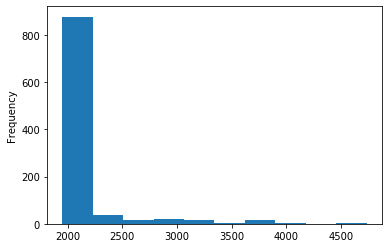

In [20]:
df[df['tariff'] == 'ultra']['total_paid'].plot(kind='hist', bins=10)
plt.show();

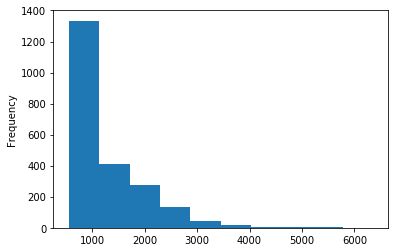

In [21]:
df[df['tariff'] == 'smart']['total_paid'].plot(kind='hist', bins=10)
plt.show()

In [22]:
df.groupby('tariff').agg({'total_paid':['median','mean','var','std']}).style.format("{:.2f}")

Можно сделать аткой вывод по тарифу "Ультра" абоненты в основном укладываются в абонентскую плату, в тоже время на "Смарте" довольно чаще платять суммы превыщающие ее.

### Изучим длительность звонков

In [23]:
#теперь изучим длительность звонков
df.groupby('tariff').agg({'calls_duration':['median','mean','var','std']}).style.format("{:.2f}")

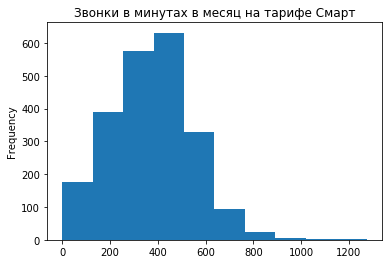

In [24]:
df[df['tariff'] == 'smart']['calls_duration'].plot(kind='hist', bins=10)
plt.title('Звонки в минутах в месяц на тарифе Смарт')
plt.show()

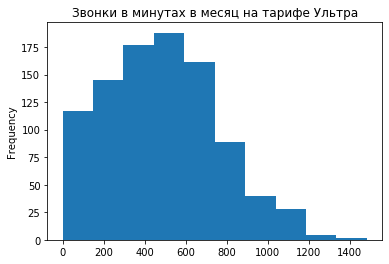

In [25]:
df[df['tariff'] == 'ultra']['calls_duration'].plot(kind='hist', bins=10)
plt.title('Звонки в минутах в месяц на тарифе Ультра')
plt.show()

Вывод: на "Смарте" в абонентской плате предусмотрено 500 бесплатных минут и практически все их абоненты выговаривают. В "Ультра" наоборот, каждый месяц невыговоренными остается большое количество минут. Медиана и среднее значение находятся рядом на обоих тарифах.

### Изучим колличество СМС сообщений

In [26]:
# смс
df.groupby('tariff').agg({'sms_total':['median','mean','var','std']}).style.format("{:.2f}")

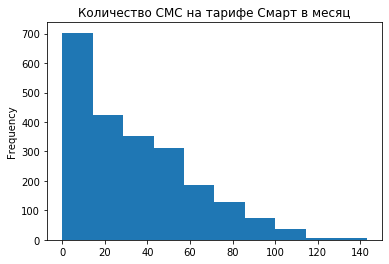

In [27]:
df[df['tariff'] == 'smart']['sms_total'].plot(kind='hist', bins=10)
plt.title('Количество СМС на тарифе Смарт в месяц')
plt.show()

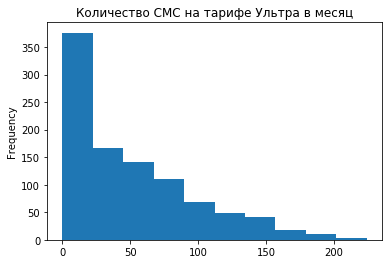

In [28]:
df[df['tariff'] == 'ultra']['sms_total'].plot(kind='hist', bins=10)
plt.title('Количество СМС на тарифе Ультра в месяц')
plt.show()

основная масса пользователей ultra использует еще меньше сообщений, чем в smart. Однако, опять-таки, есть и те, кто отправляет 100 и больше сообщений. Но лимита в 1000 сообщений не достигает никто. Скорее всего нужно пересмотреть распределение бесплатных смс по тарифам, разбежка в 20 раз явно непродума

### Изучим интернет-трафик 

In [29]:
#проанализируем интернет трафик
df.groupby('tariff').agg({'mb_total':['median','mean','var','std']}).style.format("{:.2f}")

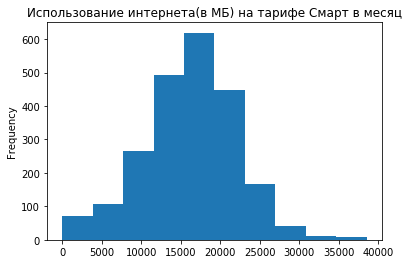

In [30]:
df[df['tariff'] == 'smart']['mb_total'].plot(kind='hist', bins=10)
plt.title('Использование интернета(в МБ) на тарифе Смарт в месяц')
plt.show()

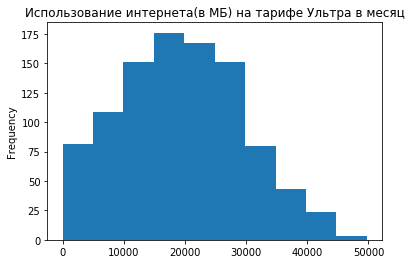

In [31]:
df[df['tariff'] == 'ultra']['mb_total'].plot(kind='hist', bins=10)
plt.title('Использование интернета(в МБ) на тарифе Ультра в месяц')
plt.show()

Здесь также среднее и медиана очень близко лежат. Абонентам "Смарт" явно не хватает включенного трафика в абонплату, на "Ультре" у всех опять огромные запасы остаются.
Здесь становится понятно, почему основная масса пользователей тарифа ultra выбирает именно его. Они используют намного больше трафика, чем пользователи smart.

Пользователи тарифа ultra используют гораздо больше трафика, чем пользователи более дешевого тарифа. Можно предположить, что те, кто выбирает тариф ultra заинтересованы именно в более активном пользовании интернетом.

Вывод:

Пользователи smart тарифа используют чуть меньшее количество минут звонков и сообщений в месяц, чем пользователи ultra. Лимита на звонки и минуты в ultra в среднем не достигает никто. При этом интернетом пользователи ultra пользуются гораздо активнее. Скорее всего, пользователи ultra выбирают этот тариф из-за большего интернет-трафика.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Все так

## Проверьте гипотезы

Сравнимые выборки независимы между собой, поэтому для использования возьмем t-критерий Стьюдента.

Гипотеза о равенстве средних двух генеральных совокупностей №1
Сформулируем гипотезы:

основная H0: выручка пользователей тарифов «Ультра» и «Смарт» не различается
аольтернативная H1: выручка пользователей тарифов «Ультра» и «Смарт» различается

### средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Гипотеза о равенстве средних двух генеральных совокупностей №1
Сформулируем гипотезы:

основная H0: выручка пользователей тарифов «Ультра» и «Смарт» не различается
аольтернативная H1: выручка пользователей тарифов «Ультра» и «Смарт» различается

In [32]:
#функция для удаления выбросов
def delete_outliers(df, column, graphic=0, x = 10, y = 10):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    iqr_test = (df[column] >= (q1 - 1.5 * iqr)) & (df[column] <= (q3 + 1.5 * iqr))
    if graphic == 1:
        return df.loc[iqr_test].boxplot([column], figsize=(x,y))
    else:
        return df.loc[iqr_test]

In [33]:
df['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [34]:
ultra = df[df['tariff'] == 'ultra']
ultra = delete_outliers(ultra, 'total_paid', 0)
ultra = ultra['total_paid']

smart = df[df['tariff'] == 'smart']
smart = delete_outliers(smart, 'total_paid', 0)
smart = smart['total_paid']

alpha = 0.05

results = st.ttest_ind(ultra, smart)


print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.9161758654925636e-266
Отвергаем нулевую гипотезу


### средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов

Сформулируем гипотезы:

оновная H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов \
алтернативная H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [36]:
df['region'] = np.where(df['city'] == 'Москва', 'Москва', 'Провинция')

moscow = df[df['region'] == 'Москва']
moscow = delete_outliers(moscow, 'total_paid', 0)
moscow = moscow['total_paid']

province = df[df['region'] == 'Провинция']
province = delete_outliers(province, 'total_paid', 0)
province = province['total_paid']

results = st.ttest_ind(moscow, province)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.23563887187992513
Не получилось отвергнуть нулевую гипотезу


С вероятностью в 23,6 % такой результат может быть получен случайно. Значимых различий нет.

## Общий вывод

Как видно по поведению пользователей на тарифах, они довольно сильно различаются: кому-то необходим только интернет, а кто-то использует все запасы смс и выговаривает все бесплатные минуты. Тут нельзя найти какой-то баланс, ведь все люди разные.

Замечания по тарифу "Смарт":

есть заметная переплата, бонусы, включенные в абонентскую плату небольшие и быстро заканчиваются.
необходимо добавить бесплатных мегабайт интернет-трафика
немного увеличить количество включенных бесплатных минут
уменьшить цену услуг вне включенных в пакет
Замечания по тарифу "Ультра":

сократить частично минуты, смс и включенных трафик
за счет этого ввести какой-то дополнительный бонус
либо уменьшить немного абонентскую плату, что возможно поможет переманить на него часть клиентов со "Смарта"
Тарифы приносят разные по размерам деньги, хотя это и подразумевалось изначально, так как они заточены под разные аудитории.
Абоненты из Москвы и регионов приносят примерно одинаковую выручку компании, скорее всего это связано со стандартным набором услуг мобильной связи, который довольно схож для людей разного социального и имущественного статуса.